### K4eras image preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout
from keras.optimizers import Adam

img_width, img_height = 28, 28

Using TensorFlow backend.


In [ ]:
train_data_dir = 'data/train'

valid_data_dir = 'data/valid'

In [ ]:
train_samples = 35990

validation_samples = 6010

In [ ]:
model = Sequential()

model.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,3)))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=.2,
                               rotation_range=20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen = train_gen.flow_from_directory(train_data_dir,
                                              target_size=(img_width, img_height),
                                              batch_size=32,
                                              class_mode='categorical')

validation_generator = test_gen.flow_from_directory(valid_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode='categorical')

In [ ]:
model.fit_generator(train_datagen,
                    steps_per_epoch=int(train_samples/float(32)),
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps = int(validation_samples/float(32)))

In [ ]:
model.save_weights('model_images_preprocess.h5')

model_json = model.to_json()
with open("model_mnist_images_preprocess.json", "w") as json_file:
    json_file.write(model_json)

In [1]:
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
json_file = open('model_mnist_images_preprocess.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_images_preprocess.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
import cv2
import numpy as np

In [13]:
#img = cv2.imread('data/test/num0.png')
img = cv2.imread('test_images/2_1.png')
img = cv2.resize(img,(28,28))

arr = np.array(img,dtype='float')
arr /=255

In [14]:
arr = arr.reshape(1,28,28,3)

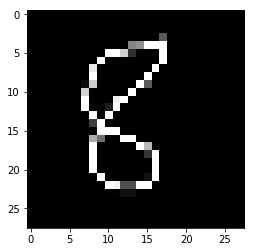

In [15]:
import matplotlib.pyplot as plt

rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [ ]:
model.predict(arr).argmax()

In [16]:
loaded_model.predict(arr).argmax()

8

In [ ]:
import os

test_data=os.listdir('test_images')

In [ ]:
test_img=[]
pred = []
for i in test_data:
    if i.endswith('.png'):
        img = cv2.imread('test_images/'+i)
        img = cv2.resize(img,(28,28))
        test_img.append(img)
        arr = np.array(img,dtype='float')
        arr /=255
        arr = arr.reshape(1,28,28,3)
        pred.append(loaded_model.predict(arr).argmax())
        

In [ ]:
pred

In [ ]:
test = np.asarray(test_img)
plt.figure(figsize=(5,5))
for i,t in zip(range(10),pred):
    plt.subplot(3,4,i+1)
    plt.axis('off')
    plt.imshow(test[i],cmap=plt.cm.gray_r)
    
    plt.title(t)